# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoLocator
%matplotlib inline

# 1.1 Cleaning Messy Outcome Labels
1. Loading the cases

In [2]:
cases_train = pd.read_csv('../data/cases_2021_train.csv')
cases_train.head()

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,Hospitalized,NaN
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,Recovered,NaN
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,Hospitalized,NaN
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,Hospitalized,NaN
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,Hospitalized,NaN


2. Outcome Distribution

In [3]:
cases_train.groupby('outcome').size()

outcome
Alive                               127
Dead                                  9
Death                                 4
Deceased                           3361
Died                                  4
Discharged                            2
Discharged from hospital              3
Hospitalized                     135524
Receiving Treatment                 183
Recovered                         62875
Stable                               24
Under treatment                     243
critical condition                    1
death                                29
died                                624
discharge                           114
discharged                           82
recovered                          2435
recovering at home 03.03.2020         2
released from quarantine              3
stable                              107
stable condition                     90
dtype: int64

3. Filling Outcome_Group 


In [4]:
hospitalzed = ['Discharged', 'Discharged from hospital', 'Hospitalized', 'critical condition',
'discharge', 'discharged']
nonhospitalized = ['Alive', 'Receiving Treatment', 'Stable', 'Under treatment', 'recovering at home 03.03.2020', 'released from quarantine', 'stable', 'stable condition']
deceased = ['Dead', 'Death', 'Deceased', 'Died', 'death', 'died']
recovered = ['Recovered','recovered']
cases_train.loc[cases_train["outcome"].isin(hospitalzed), "outcome_group"] ='hospitalized'
cases_train.loc[cases_train["outcome"].isin(nonhospitalized), "outcome_group"] ='nonhospitalized'
cases_train.loc[cases_train["outcome"].isin(deceased), "outcome_group"] ='deceased'
cases_train.loc[cases_train["outcome"].isin(recovered), "outcome_group"] ='recovered'
print(cases_train.groupby('outcome_group').size())
cases_train = cases_train.drop(columns="outcome")
cases_train.head()

outcome_group
deceased             4031
hospitalized       135726
nonhospitalized       779
recovered           65310
dtype: int64


,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,hospitalized
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,recovered
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,hospitalized
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,hospitalized
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,hospitalized


# Task 1.3 - Train data analysis

In [5]:
by_day=cases_train['date_confirmation'].value_counts().rename_axis('date').reset_index(name='counts')

by_day['date']=pd.to_datetime(by_day['date'], errors='coerce',infer_datetime_format=True)
by_day['counts']=by_day['counts'].astype(int)

by_day=by_day.sort_values(by='date')

In [6]:
by_day=by_day.dropna(axis=0)

In [7]:
totals=[]
totals.append(by_day['counts'].iloc[0])
for i in range(1,137):
       totals.append(totals[i-1]+by_day['counts'].iloc[i])

In [8]:
by_day['totals']=totals

In [9]:
by_day

,date,counts,totals
126,2020-01-06,2,2
130,2020-01-15,1,3
129,2020-01-18,1,4
133,2020-01-20,1,5
123,2020-01-21,3,8
...,...,...,...
3,2020-05-30,8710,189078
1,2020-05-31,9413,198491
6,2020-06-01,7297,205788
124,2020-06-02,2,205790


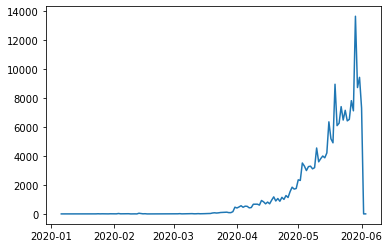

In [10]:
plt.plot(by_day['date'],by_day['counts'])
plt.show()

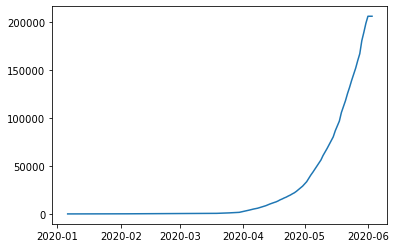

In [11]:
plt.plot(by_day['date'],by_day['totals'])